## 1. Package Installation for Data Preparation

In [1]:
!pip install opendatasets

## 2. Import required libraries

In [2]:
# === IMPORT ALL REQUIRED LIBRARIES FIRST ===
import opendatasets as od
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets
from sklearn.model_selection import train_test_split
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")

All libraries imported successfully!


## 3. Set your dataset path

In [3]:
dataset_path = r"C:\Users\User\OneDrive\Desktop\Garbage_Dataset_Classification\images"

## 4. Load training and validation data and resize the images

In [4]:
import opendatasets as od
import os

# Download dataset directly from Kaggle
dataset_url = 'https://www.kaggle.com/datasets/zlatan599/garbage-dataset-classification'
od.download(dataset_url)

# Find the correct path
data_dir = "/content/garbage-dataset-classification/images"

# If the path doesn't exist, search for it
if not os.path.exists(data_dir):
    for root, dirs, files in os.walk('/content'):
        if 'images' in dirs and 'cardboard' in os.listdir(os.path.join(root, 'images')):
            data_dir = os.path.join(root, 'images')
            print(f"Found dataset at: {data_dir}")
            break

print("Dataset path:", data_dir)

# Create datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

class_names = train_ds.class_names
print("Class names:", class_names)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kasuninethra
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/zlatan599/garbage-dataset-classification


100%|██████████| 121M/121M [00:00<00:00, 1.08GB/s]

Found dataset at: /content/garbage-dataset-classification/Garbage_Dataset_Classification/images
Dataset path: /content/garbage-dataset-classification/Garbage_Dataset_Classification/images
Found 13901 files belonging to 6 classes.
Using 11121 files for training.
Found 13901 files belonging to 6 classes.
Using 2780 files for validation.
Class names: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


## 5. Display Sample Images with Histograms

Sample Images with their Histograms:


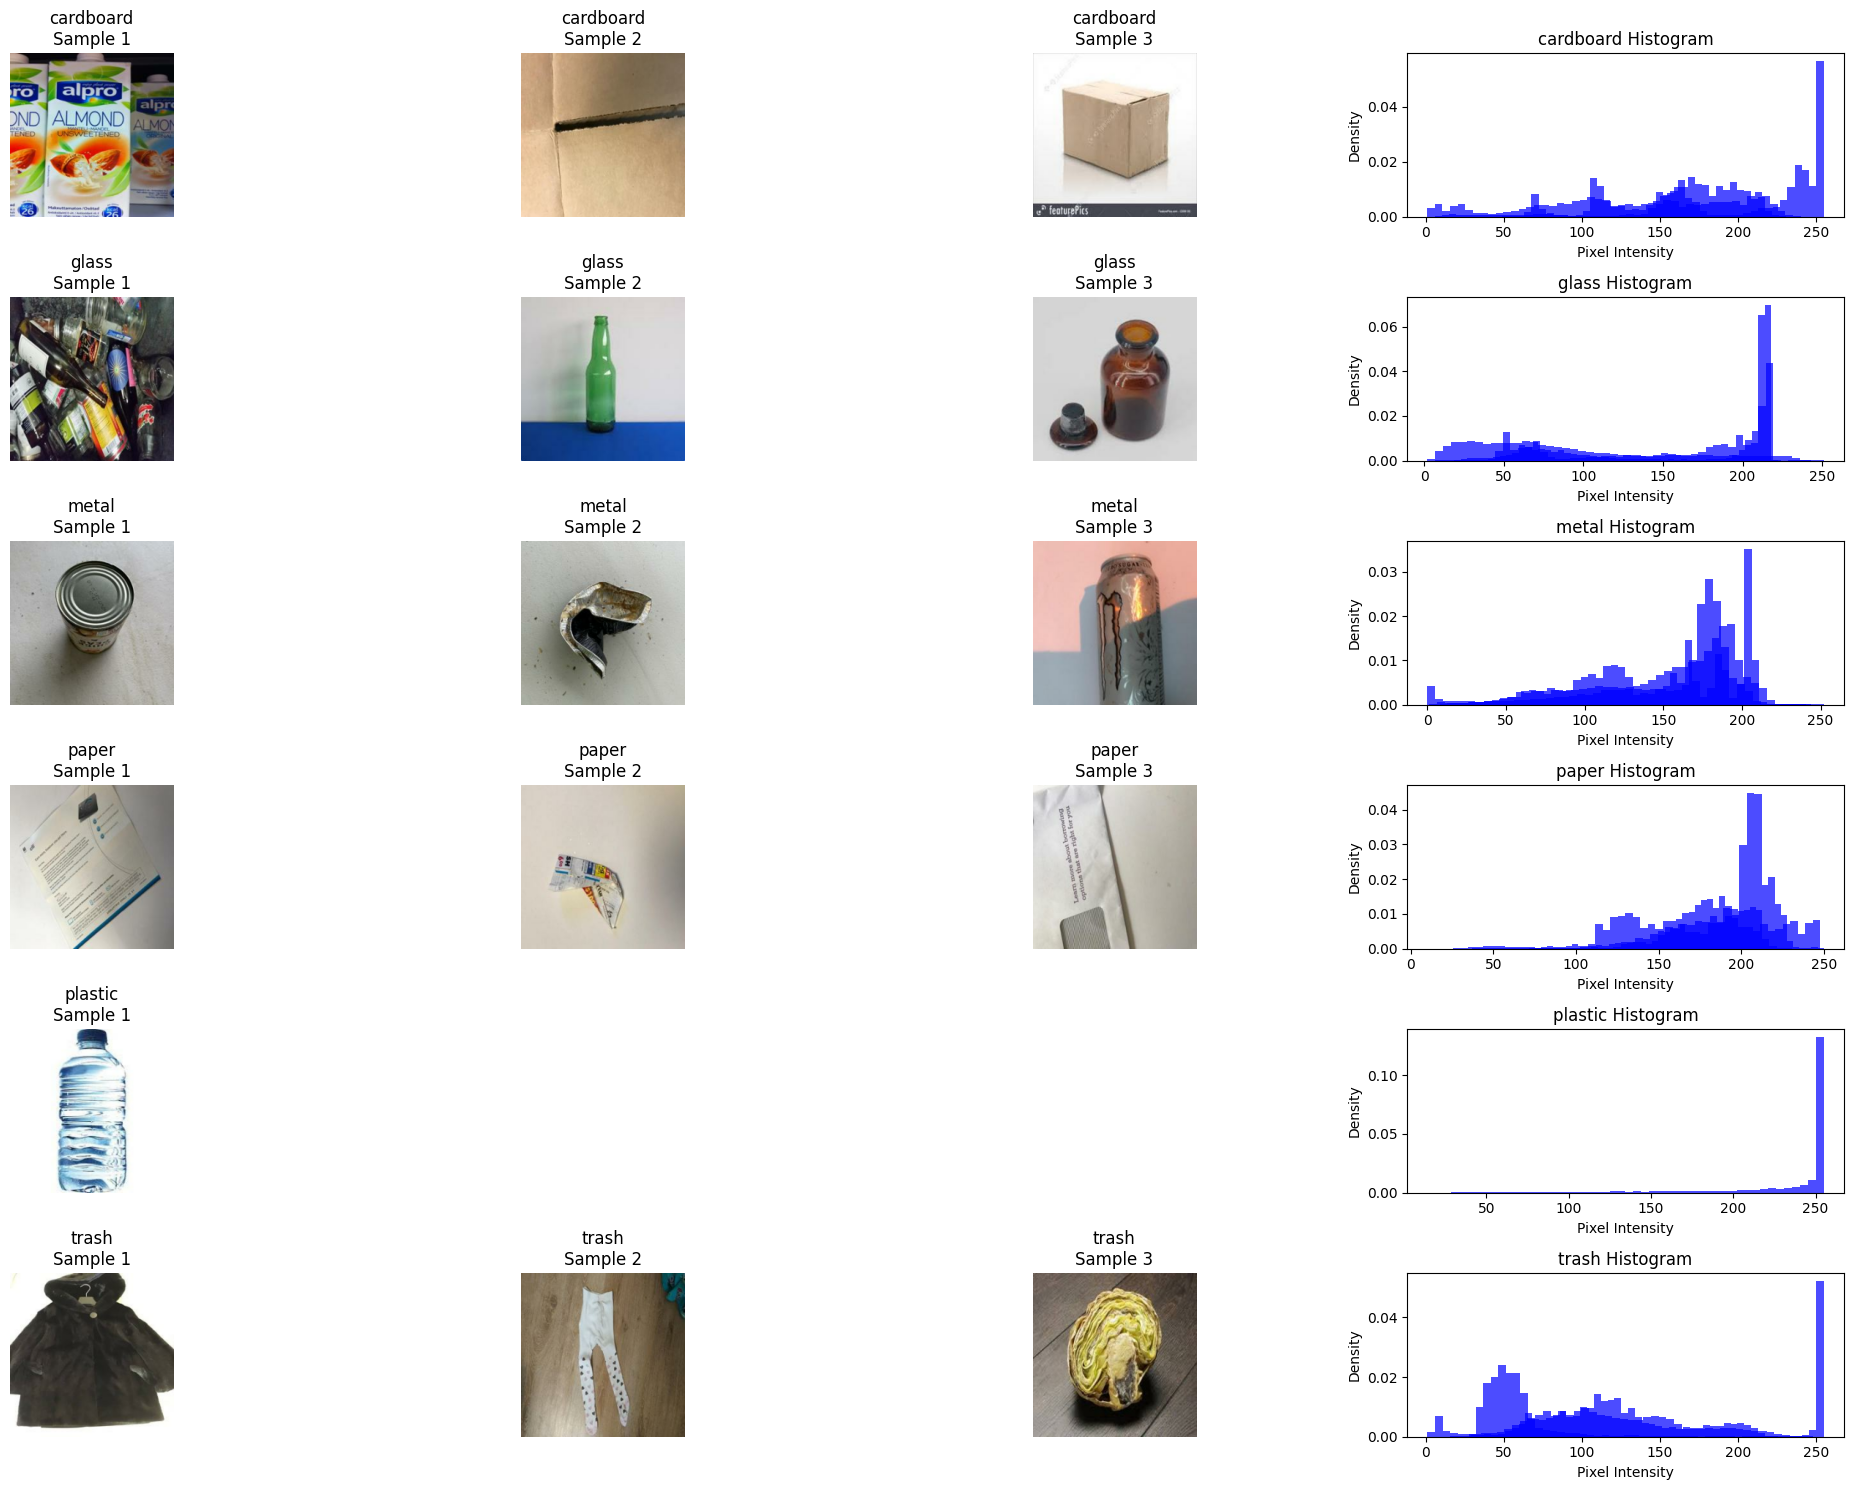

In [5]:
def display_sample_images_with_histograms(dataset, class_names, num_samples=3):
    plt.figure(figsize=(20, 15))

    # Take one batch from the dataset
    for images, labels in dataset.take(1):
        # Create a dictionary to store images by class
        class_images = {class_name: [] for class_name in class_names}

        # Organize images by class
        for i in range(len(images)):
            if len(class_images[class_names[labels[i]]]) < num_samples:
                class_images[class_names[labels[i]]].append(images[i])

        # Display samples for each class
        for i, class_name in enumerate(class_names):
            for j in range(min(num_samples, len(class_images[class_name]))):
                img = class_images[class_name][j]

                # Plot image
                plt.subplot(len(class_names), num_samples + 1, i * (num_samples + 1) + j + 1)
                plt.imshow(img.numpy().astype("uint8"))
                plt.title(f'{class_name}\nSample {j+1}')
                plt.axis('off')

                # Plot histogram
                plt.subplot(len(class_names), num_samples + 1, i * (num_samples + 1) + num_samples + 1)

                # Convert to grayscale for histogram
                gray_img = cv2.cvtColor(img.numpy().astype("uint8"), cv2.COLOR_RGB2GRAY)
                plt.hist(gray_img.flatten(), bins=50, alpha=0.7, color='blue', density=True)
                plt.title(f'{class_name} Histogram')
                plt.xlabel('Pixel Intensity')
                plt.ylabel('Density')

        break  # Only process first batch

    plt.tight_layout()
    plt.show()

# Display sample images with histograms
print("Sample Images with their Histograms:")
display_sample_images_with_histograms(train_ds, class_names)

## 6.VISUALIZE ORIGINAL IMAGES &  ANALYZE ORIGINAL HISTOGRAMS

Step 1: Visualizing original normalized images...


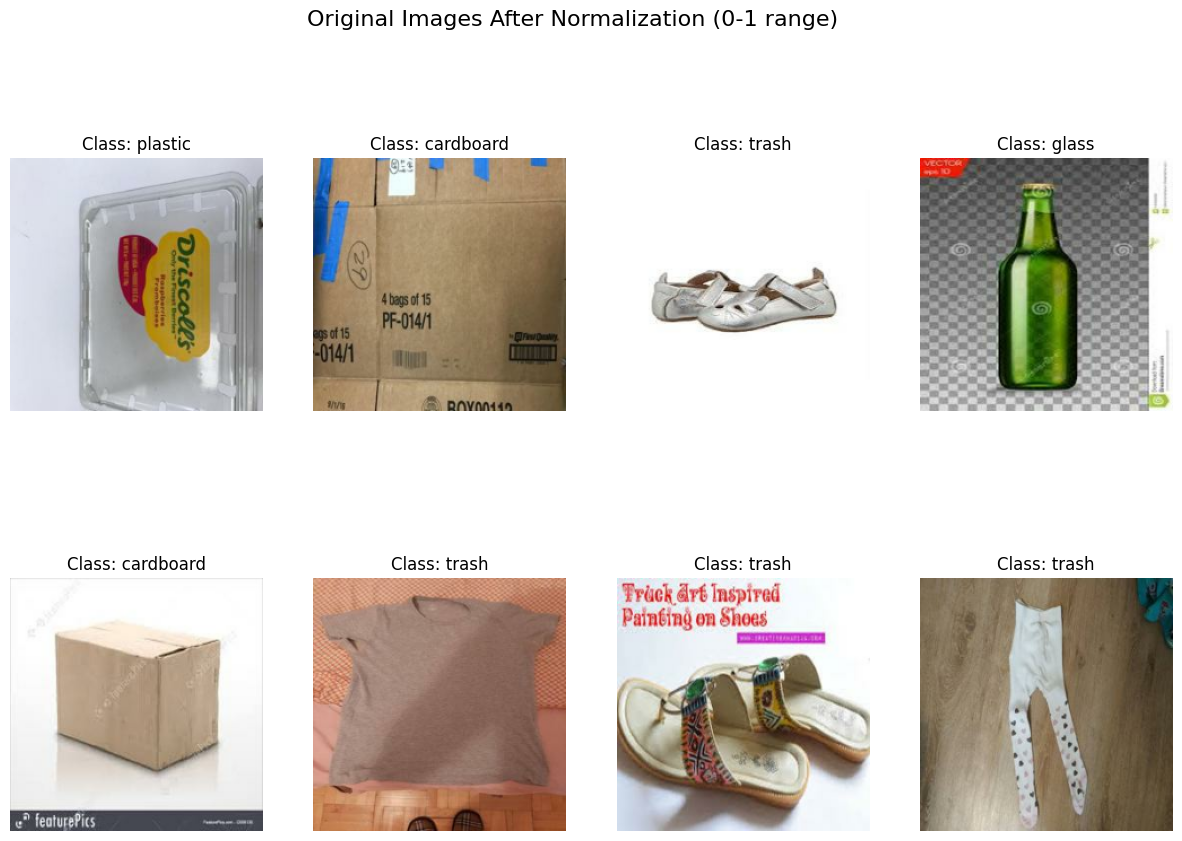

Step 2: Analyzing original histograms...


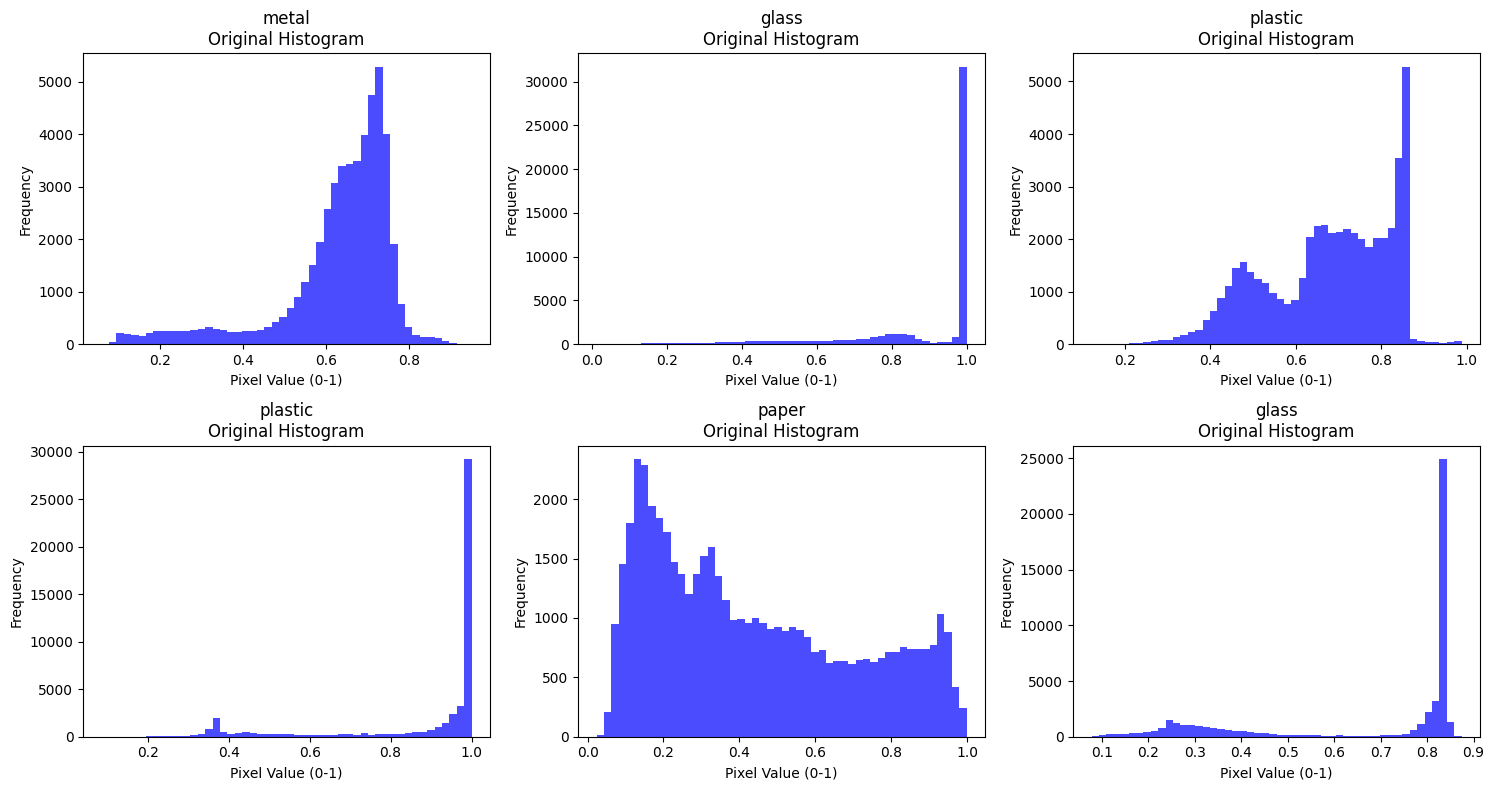

In [7]:
#Apply basic normalization (you might be missing this)
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds_normalized = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds_normalized = val_ds.map(lambda x, y: (normalization_layer(x), y))


# 1. VISUALIZE ORIGINAL IMAGES
print("Step 1: Visualizing original normalized images...")
def visualize_original_normalized():
    for images, labels in train_ds_normalized.take(1):
        plt.figure(figsize=(15, 10))
        for i in range(8):
            plt.subplot(2, 4, i+1)
            plt.imshow(images[i])
            plt.title(f'Class: {class_names[labels[i]]}')
            plt.axis('off')
        plt.suptitle('Original Images After Normalization (0-1 range)', fontsize=16)
        plt.show()

visualize_original_normalized()

# 2. ANALYZE ORIGINAL HISTOGRAMS
print("Step 2: Analyzing original histograms...")
def analyze_original_histograms():
    for images, labels in train_ds_normalized.take(1):
        plt.figure(figsize=(15, 8))
        for i in range(6):
            plt.subplot(2, 3, i+1)
            gray_img = tf.image.rgb_to_grayscale(images[i])
            plt.hist(gray_img.numpy().flatten(), bins=50, alpha=0.7, color='blue')
            plt.title(f'{class_names[labels[i]]}\nOriginal Histogram')
            plt.xlabel('Pixel Value (0-1)')
            plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

analyze_original_histograms()

# 7. VISUALIZE EQUALIZED IMAGES

Loading and normalizing datasets...
Found 13901 files belonging to 6 classes.
Using 11121 files for training.
Found 13901 files belonging to 6 classes.
Using 2780 files for validation.
Class names: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
Step 1: Applying normalization...
✅ Normalization completed!
Step 2: Visualizing original normalized images...


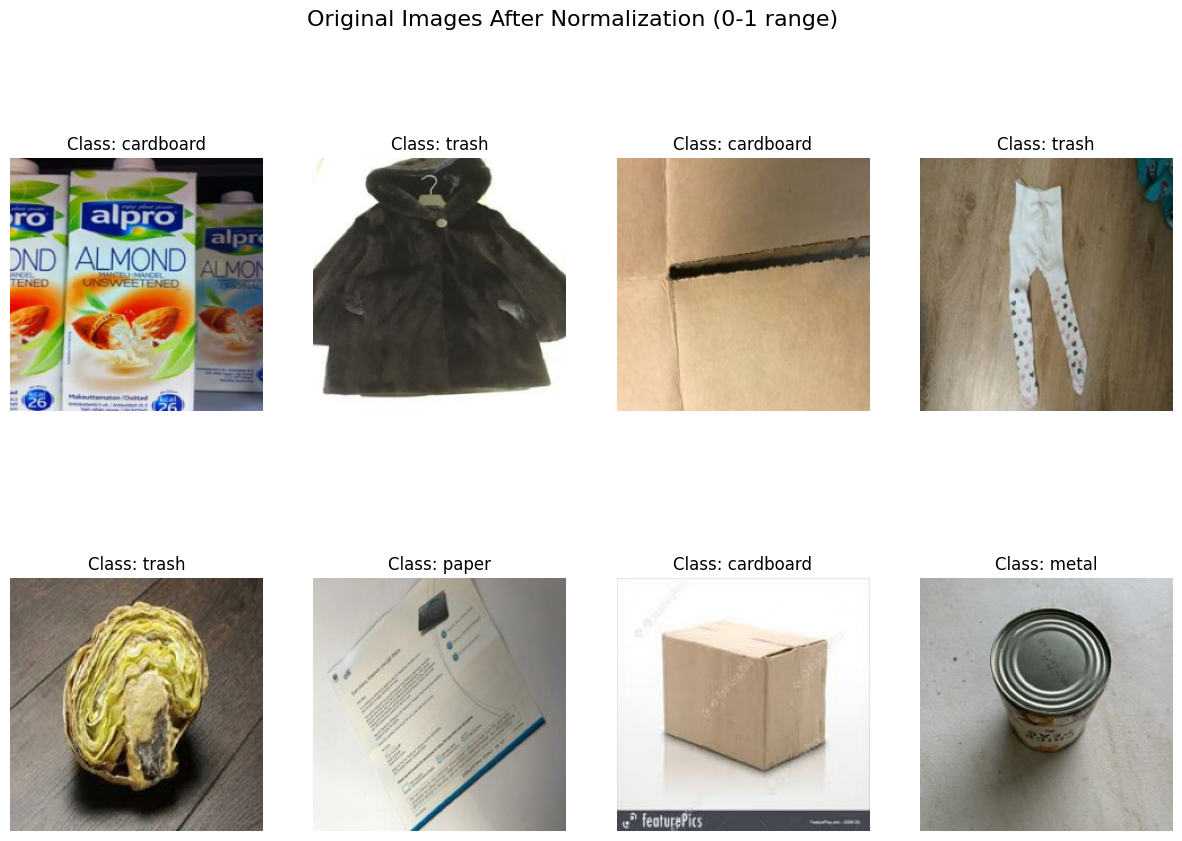

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# First, let's make sure we have the normalized datasets
print("Loading and normalizing datasets...")

# Your original dataset loading
data_dir = "/content/garbage-dataset-classification/Garbage_Dataset_Classification/images"

# Create datasets (80/20 split)
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

class_names = train_ds.class_names
print("Class names:", class_names)

# Step 1: Normalize the datasets
print("Step 1: Applying normalization...")
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds_normalized = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds_normalized = val_ds.map(lambda x, y: (normalization_layer(x), y))

print("✅ Normalization completed!")

# =============================================================================
# 1. VISUALIZE ORIGINAL IMAGES
# =============================================================================
print("Step 2: Visualizing original normalized images...")
def visualize_original_normalized():
    for images, labels in train_ds_normalized.take(1):
        plt.figure(figsize=(15, 10))
        for i in range(8):
            plt.subplot(2, 4, i+1)
            plt.imshow(images[i])
            plt.title(f'Class: {class_names[labels[i]]}')
            plt.axis('off')
        plt.suptitle('Original Images After Normalization (0-1 range)', fontsize=16)
        plt.show()

visualize_original_normalized()